# Classic Design of Experiments II

In this notebook, we will learn about classic design of experiments (DoE) techniques.

We start with implementing a full factorial approach, learn about the Halton sequence, implement the Latin hypercube, and end with a comparison of space filling techniques.

### **Table of Contents**
1. [Full Factorial](#full-factorial)
2. [Halton Sequence](#haltonsequence)
3. [Latin Hypercube](#latin-hypercube)
4. [Comparison of Space Filling Techniques](#spacefilling-techniques)

In [114]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **1. Full Factorial** <a class="anchor" id="full-factorial"></a>

In this section, we implement the full factorial DoE technique. 

As a prerequisite, it is important to understand the general steps of designing an experiment, which are:

_Answer:_ <br/>
1. Define objective, e.g. whether to maximize the response of the experiment
2. Identify the factors and their corresponding levels
3. Define the budget , i.e. number of experimental tiral that can be performed
4. Decide on a DoE technique
5. Generate conditions using the DoE technique
6. Perform experimental trials
       

We implement the full factorial DoE technique [`full_fac`](../e2ml/experimentation/_full_factorial.py) in the [`e2ml.experimentation`](../e2ml/experimentation) subpackage. 

#### Question:
1. (a) What is the number of conditions for a full factorial design with levels [4, 5, 10] ? Verify it using your code.
    
    _Answer:_ <br/>
    $4 \times 5 \times 10 = 200$


<Figure size 3200x1600 with 0 Axes>

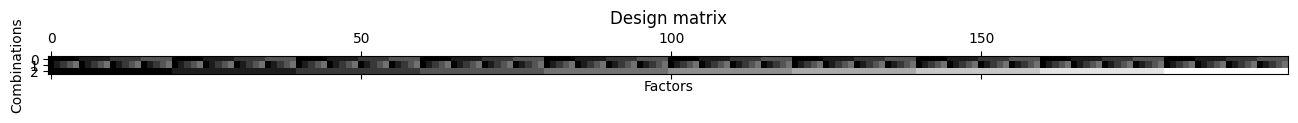

[[0 0 0]
 [0 1 0]
 [0 2 0]
 [0 3 0]
 [0 4 0]
 [1 0 0]
 [1 1 0]
 [1 2 0]
 [1 3 0]
 [1 4 0]
 [2 0 0]
 [2 1 0]
 [2 2 0]
 [2 3 0]
 [2 4 0]
 [3 0 0]
 [3 1 0]
 [3 2 0]
 [3 3 0]
 [3 4 0]
 [0 0 1]
 [0 1 1]
 [0 2 1]
 [0 3 1]
 [0 4 1]
 [1 0 1]
 [1 1 1]
 [1 2 1]
 [1 3 1]
 [1 4 1]
 [2 0 1]
 [2 1 1]
 [2 2 1]
 [2 3 1]
 [2 4 1]
 [3 0 1]
 [3 1 1]
 [3 2 1]
 [3 3 1]
 [3 4 1]
 [0 0 2]
 [0 1 2]
 [0 2 2]
 [0 3 2]
 [0 4 2]
 [1 0 2]
 [1 1 2]
 [1 2 2]
 [1 3 2]
 [1 4 2]
 [2 0 2]
 [2 1 2]
 [2 2 2]
 [2 3 2]
 [2 4 2]
 [3 0 2]
 [3 1 2]
 [3 2 2]
 [3 3 2]
 [3 4 2]
 [0 0 3]
 [0 1 3]
 [0 2 3]
 [0 3 3]
 [0 4 3]
 [1 0 3]
 [1 1 3]
 [1 2 3]
 [1 3 3]
 [1 4 3]
 [2 0 3]
 [2 1 3]
 [2 2 3]
 [2 3 3]
 [2 4 3]
 [3 0 3]
 [3 1 3]
 [3 2 3]
 [3 3 3]
 [3 4 3]
 [0 0 4]
 [0 1 4]
 [0 2 4]
 [0 3 4]
 [0 4 4]
 [1 0 4]
 [1 1 4]
 [1 2 4]
 [1 3 4]
 [1 4 4]
 [2 0 4]
 [2 1 4]
 [2 2 4]
 [2 3 4]
 [2 4 4]
 [3 0 4]
 [3 1 4]
 [3 2 4]
 [3 3 4]
 [3 4 4]
 [0 0 5]
 [0 1 5]
 [0 2 5]
 [0 3 5]
 [0 4 5]
 [1 0 5]
 [1 1 5]
 [1 2 5]
 [1 3 5]
 [1 4 5]
 [2 0 5]
 

In [115]:
from e2ml.experimentation import full_fac

# Set the number of levels for each factor
levels = [4, 5, 10]

# Create the design matrix
X = full_fac(levels)

# Plot the design matrix
fig = plt.figure(figsize=(32, 16))
plt.matshow(X.T, cmap='gray')
plt.xlabel('Factors')
plt.ylabel('Combinations')
plt.title('Design matrix')
plt.show()

# Print the design matrix
print(X)

# Print the number of combinations
print(f'Number of combinations: {X.shape[1]}')

# Print the number of factors
print(f'Number of factors: {X.shape[0]}')

# Print the number of levels for each factor
print(f'Number of levels for each factor: {levels}')

#### Question:
1. (b) What is the major disadvantage of the full factorial technique?

    _Answer:_ <br/>
    1. There are many conditions to be tested for a large number of factors and levels, which is costly in terms of computational resources, time and money.
    2. Need to transform continuous factors into dscrete factors by predefining levels.
    3. In case of continuous factors, the full factorial technique generates conditions that may have a high discrepancy, i.e. "bad coverage of the design space", which


### **2. Halton Sequence** <a class="anchor" id="haltonsequence"></a>


Now, we will implement the Halton sequence as a **space filling** technique for experimental design. 
We will use this implementation and compare it to Lating hypercube and uniform sampling as two other space filling DOE techniques.

A Halton sequence is a low-discrepancy sequence with the property that for all values of $N$, its subsequence $\mathbf{x}_1, ..., \mathbf{x}_N$ has a low **discrepancy**. Roughly said, a low discrepancy is a kind of criterion to express the fact that a sequence fills a segment, leaving no gaps. Low-discrepancy sequences are also called quasirandom sequences, due to their common use as a replacement of uniformly distributed random numbers. The *quasi* modifier is used to denote more clearly that the values of a low-discrepancy sequence are neither random nor pseudorandom. Still, such sequences share some properties of random variables.

Quasirandom numbers have an advantage over pure random numbers in that they cover the domain of interest quickly and evenly. They have an advantage over purely deterministic methods because they only give high accuracy when the number of conditions is preset. In contrast, using quasirandom sequences improves the accuracy as more conditions are added, with full reuse of the existing points. On the other hand, quasirandom point sets can have a significantly lower discrepancy for a given number of points than purely random sequences.

Halton sequences are constructed from one-dimensional van der Corput sequences. A van der Corput sequence is constructed by reversing the base-$n$ representation of the sequence of natural numbers, i.e., $1, 2, 3, \dots$.

For a given base $b = 2, 3, \dots$, the $b$-adic expansion of the positive integer $n \geq 1$ is expressed as

\begin{equation*}
    n = \sum_{j=1}^{T} a_j b^{j-1},
\end{equation*}

where $0 \leq a_j < b$ are the integer coefficients of the expansion. Accordingly, the $n$-th number in the van der Corput sequence is defined through

\begin{equation*}
    \phi_b(n) = \sum_{j=1}^{T} \frac{a_j}{b^{j}}.
\end{equation*}

#### Question:
2. (a) Which numbers are represented through $\phi_2(7)$ and $\phi_3(5)$? Use the above equations to answer this question.
   
   The $b=2$-adic expansion of $n=7$ is given through
   \begin{equation*}
       7 = 1 \cdot 2^0 + 1 \cdot 2^1  + 1 \cdot 2^2,
   \end{equation*}
   such that $a_1 = a_2 = a_3 = 1$. Accordingly, we obtain
   \begin{equation*}
       \phi_2(7) = \frac{1}{2^1} + \frac{1}{2^2} + \frac{1}{2^3} = \frac{1}{2} + \frac{1}{4} + \frac{1}{8} = \frac{7}{8} = 0.875.
   \end{equation*}
   
   The $b=3$-adic expansion of $n=5$ is given through: 
   \begin{equation*}
       5 = 2 \cdot 3^0 + 1 \cdot 3^1,
   \end{equation*}
   such that $a_1 = 2, a_2 = 1$. Accordingly, we obtain:
   \begin{equation*}
       \phi_3(5) = \frac{2}{3^1} + \frac{1}{3^2} = \frac{6}{9} + \frac{1}{9} = \frac{7}{9} \approx 0.778.
   \end{equation*}
   
   
With this knowledge, we implement the function [`van_der_corput_sequence`](../e2ml/experimentation/_halton.py) in the [`e2ml.experimentation`](../e2ml/experimentation) subpackage.
Once, the implementation has been completed, we check its validity for $b=10$ and $n_\mathrm{max}=20$.

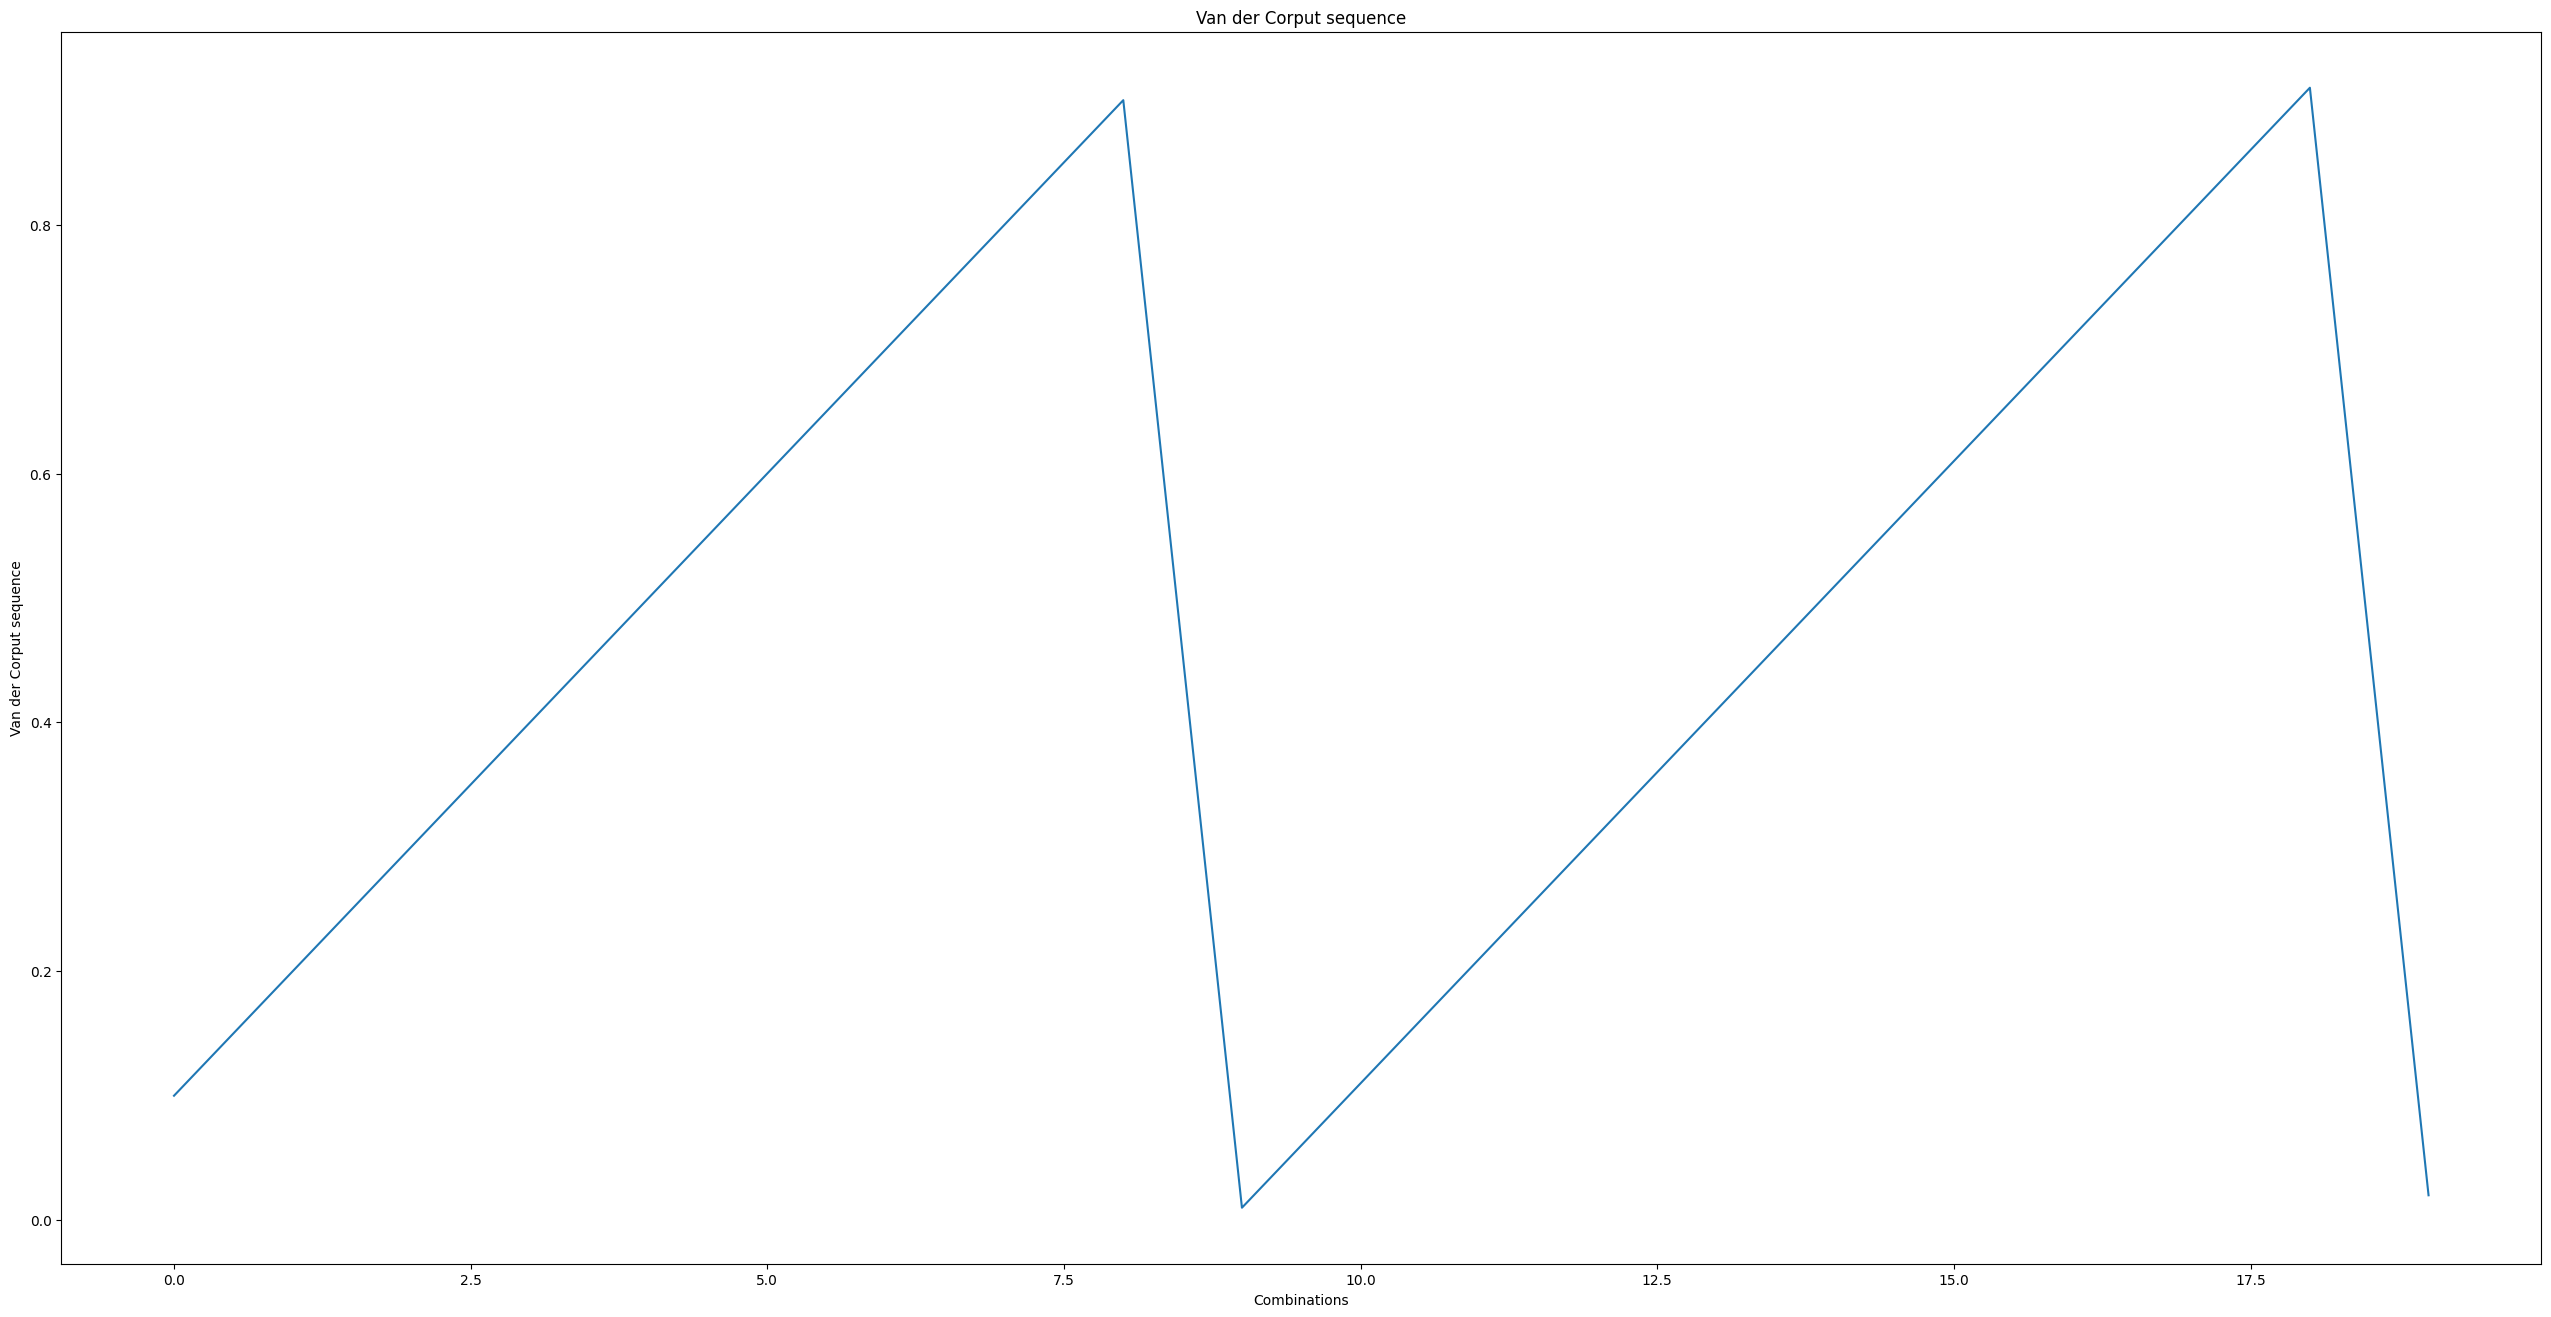

[0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.01 0.11 0.21 0.31 0.41
 0.51 0.61 0.71 0.81 0.91 0.02]


In [116]:
from e2ml.experimentation import van_der_corput_sequence
exp_sequence = np.array([
    0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 0.02
])
van_der_corput_sequence_ = van_der_corput_sequence(20, 10)
np.testing.assert_array_almost_equal(van_der_corput_sequence_, exp_sequence)

# Plot the sequence
fig = plt.figure(figsize=(32, 16))
plt.plot(van_der_corput_sequence_)
plt.xlabel('Combinations')
plt.ylabel('Van der Corput sequence')
plt.title('Van der Corput sequence')
plt.show()

# Print the sequence
print(van_der_corput_sequence_)

Multi-dimensional Halton sequences are constructed by van der Corput sequences that use so-called [coprime numbers](https://en.wikipedia.org/wiki/Coprime_integers) as its bases. For this purpose, we implement the function [`primes_from_2_to`](../e2ml/experimentation/_halton.py) in the [`e2ml.experimentation`](../e2ml/experimentation) subpackage. This function generates prime numbers from $2$ to $n_\mathrm{max}$. We check the function's validity for the prime numbers until $50$.

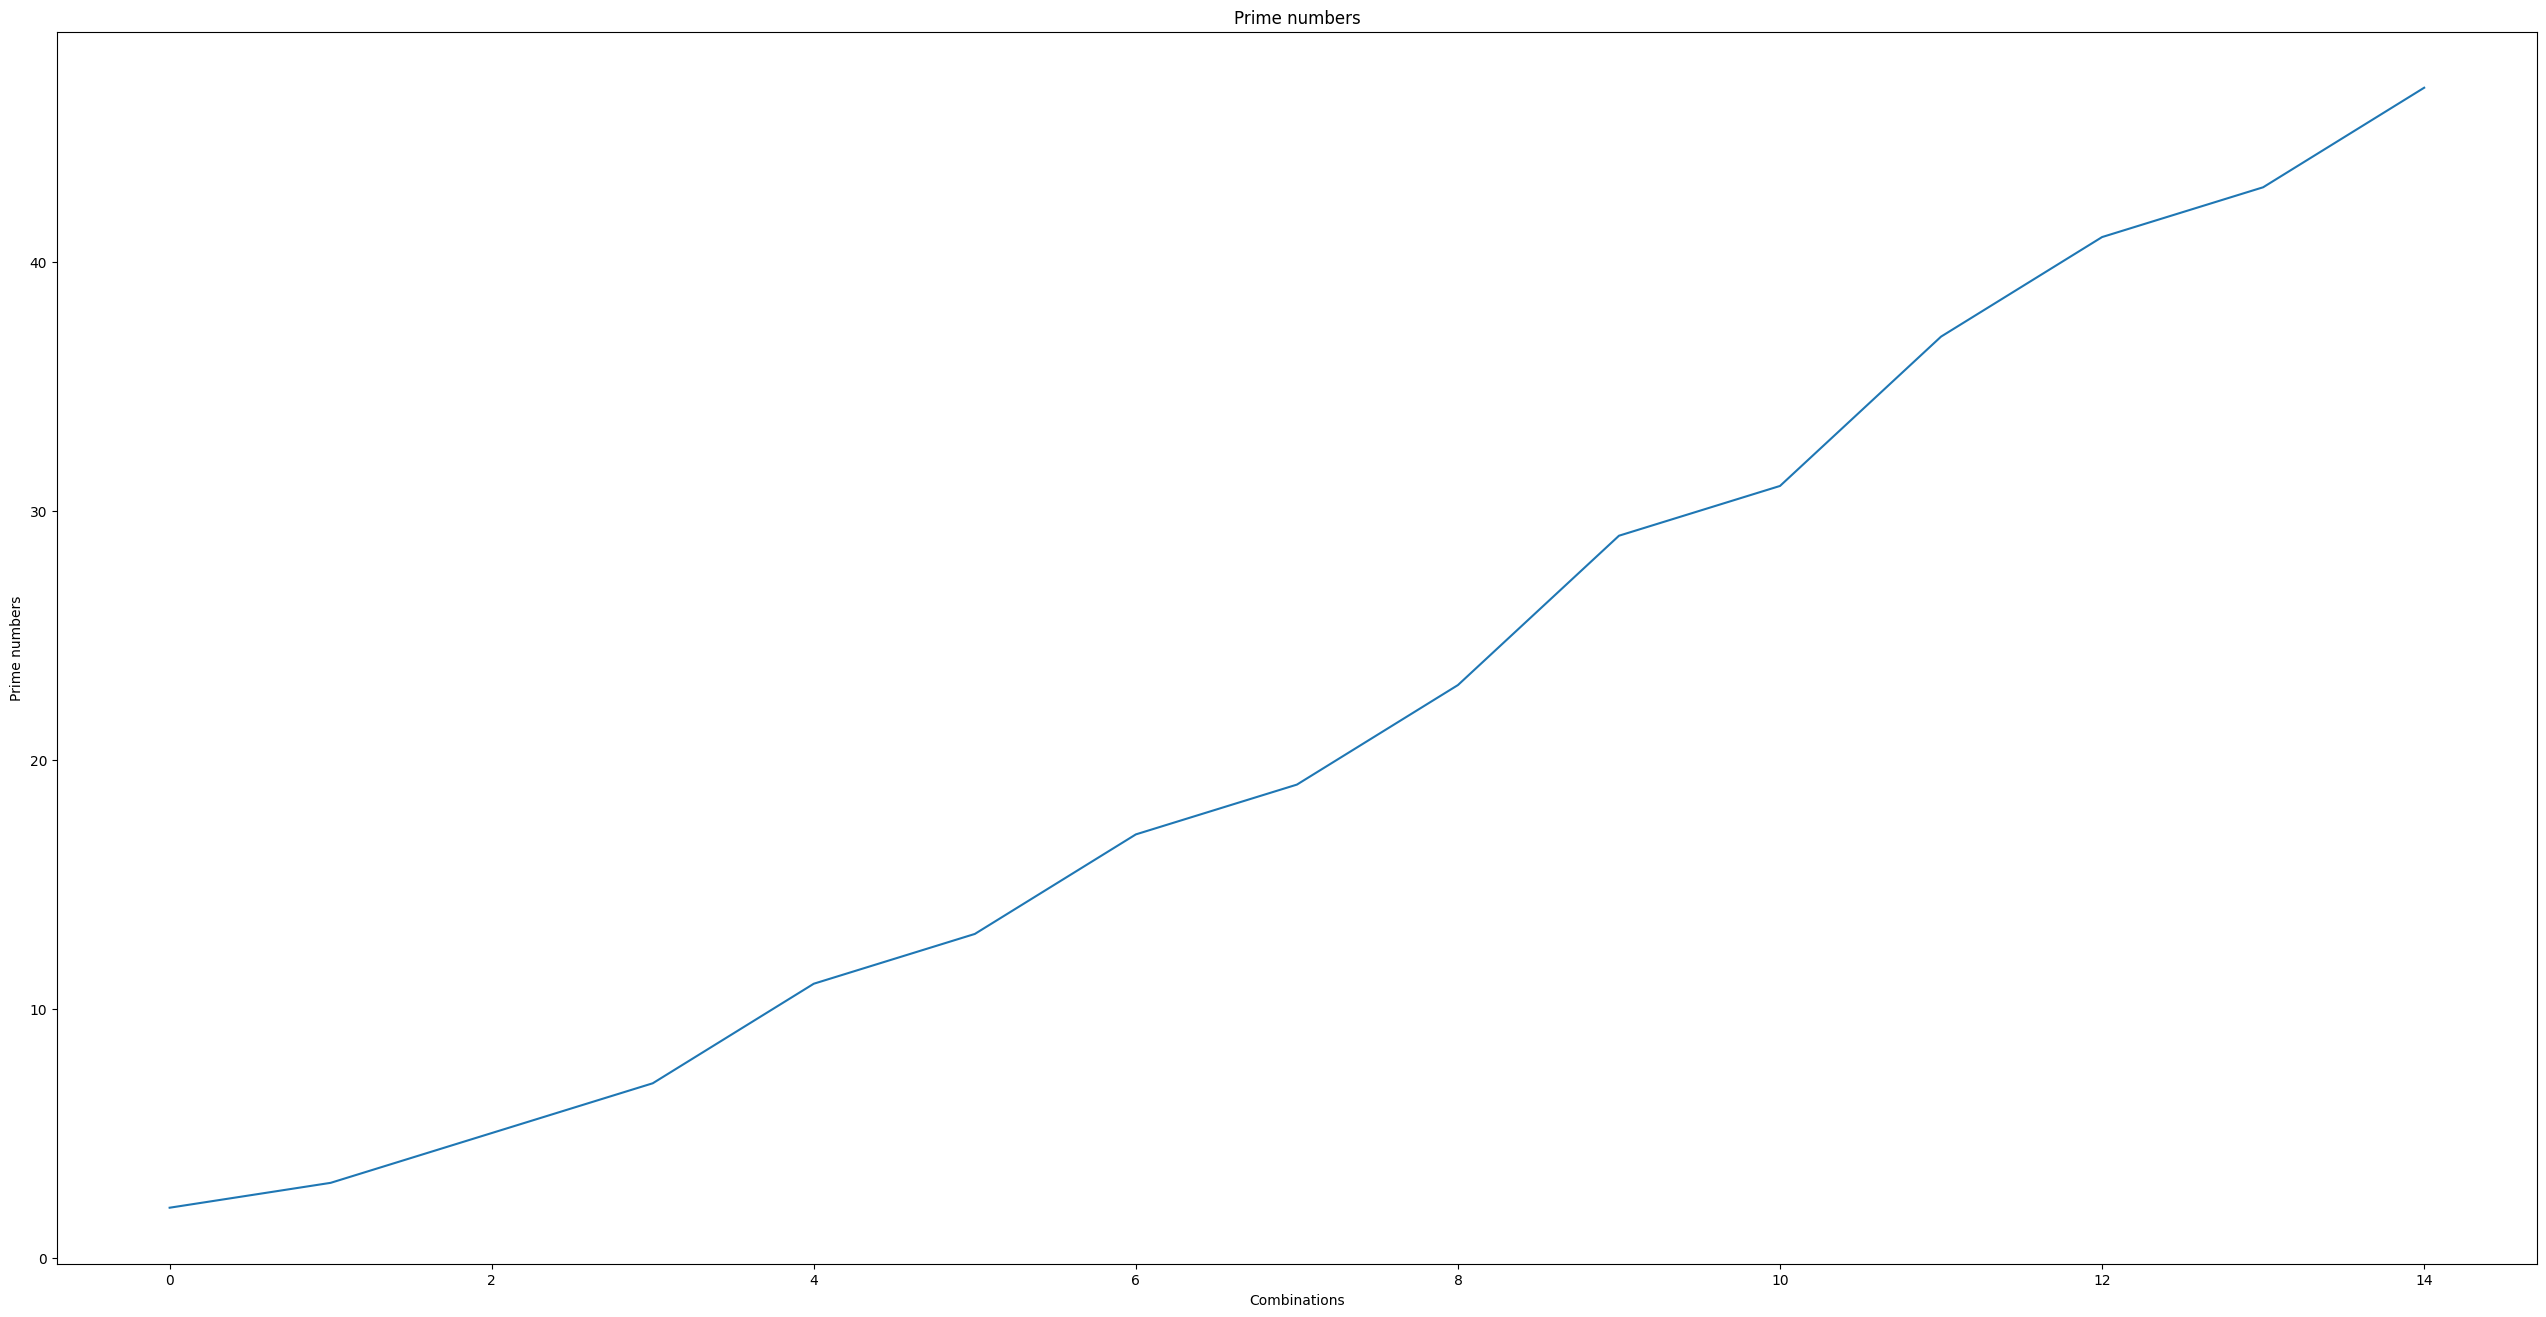

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


In [117]:
from e2ml.experimentation import primes_from_2_to
exp_prime_numbers = np.array([2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47])
primes_from_2_to_50 = primes_from_2_to(50)
np.testing.assert_array_equal(primes_from_2_to_50, exp_prime_numbers)

# Plot the prime numbers
fig = plt.figure(figsize=(32, 16))
plt.plot(primes_from_2_to_50)
plt.xlabel('Combinations')
plt.ylabel('Prime numbers')
plt.title('Prime numbers')
plt.show()

# Print the prime numbers
print(primes_from_2_to_50)

Given the van der Corput sequence and primer numbers generator, we can now implement a multi-dimensional Halton sequence by using for each dimension one van der Corput sequence with a unique prime number as basis, i.e., each dimension must use a different prime number.
We implement the function [`halton_unit`](../e2ml/experimentation/_halton.py) in the [`e2ml.experimentation`](../e2ml/experimentation) subpackage. It generates conditions $\mathbf{x} \in [0, 1]^D$.

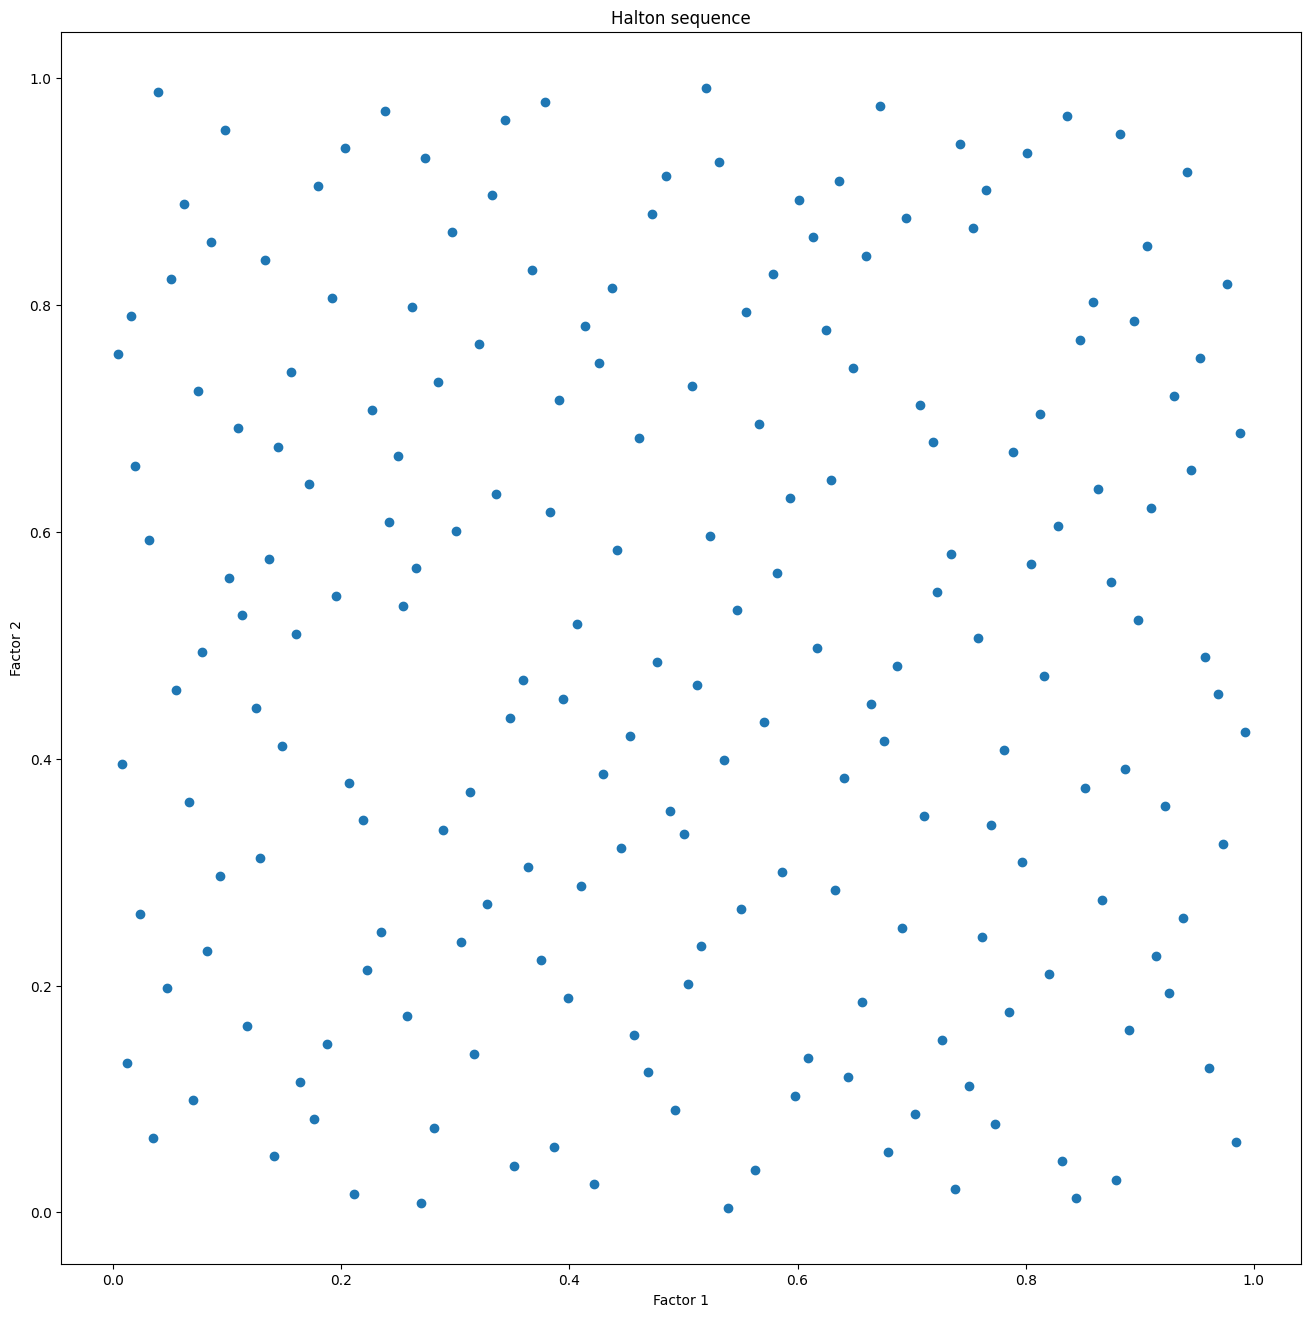

[[0.5        0.33333333]
 [0.25       0.66666667]
 [0.75       0.11111111]
 [0.125      0.44444444]
 [0.625      0.77777778]
 [0.375      0.22222222]
 [0.875      0.55555556]
 [0.0625     0.88888889]
 [0.5625     0.03703704]
 [0.3125     0.37037037]
 [0.8125     0.7037037 ]
 [0.1875     0.14814815]
 [0.6875     0.48148148]
 [0.4375     0.81481481]
 [0.9375     0.25925926]
 [0.03125    0.59259259]
 [0.53125    0.92592593]
 [0.28125    0.07407407]
 [0.78125    0.40740741]
 [0.15625    0.74074074]
 [0.65625    0.18518519]
 [0.40625    0.51851852]
 [0.90625    0.85185185]
 [0.09375    0.2962963 ]
 [0.59375    0.62962963]
 [0.34375    0.96296296]
 [0.84375    0.01234568]
 [0.21875    0.34567901]
 [0.71875    0.67901235]
 [0.46875    0.12345679]
 [0.96875    0.45679012]
 [0.015625   0.79012346]
 [0.515625   0.2345679 ]
 [0.265625   0.56790123]
 [0.765625   0.90123457]
 [0.140625   0.04938272]
 [0.640625   0.38271605]
 [0.390625   0.71604938]
 [0.890625   0.16049383]
 [0.078125   0.49382716]


In [118]:
from e2ml.experimentation import halton_unit
# Generate 200 two-dimensional conditions as `X` with the Halton sequence.
X = halton_unit(200, 2)

# Plot generated conditions.
fig = plt.figure(figsize=(16, 16))
plt.plot(X[:,0], X[:,1], 'o')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Halton sequence')
plt.show()

# Print the design matrix
print(X)

# Print the number of combinations
print(f'Number of combinations: {X.shape[0]}')

# Print the number of factors
print(f'Number of factors: {X.shape[1]}')

In many experiments, we want to generate conditions whose levels lie in specific intervals for each dimension.

#### Question:
2. (b) How to scale the values $x_1, \dots, x_N \in [0, 1]$ such that all of them lie in the interval $[a, b]$ with $a,b \in \mathbb{R}$.

   TODO
   
We extend the function [`halton_unit`](../e2ml/experimentation/_halton.py) by allowing to define boundaries for each dimension's interval through scaling. Therefore, we implement the function [`halton`](../e2ml/experimentation/_halton.py) in the [`e2ml.experimentation`](../e2ml/experimentation) subpackage.

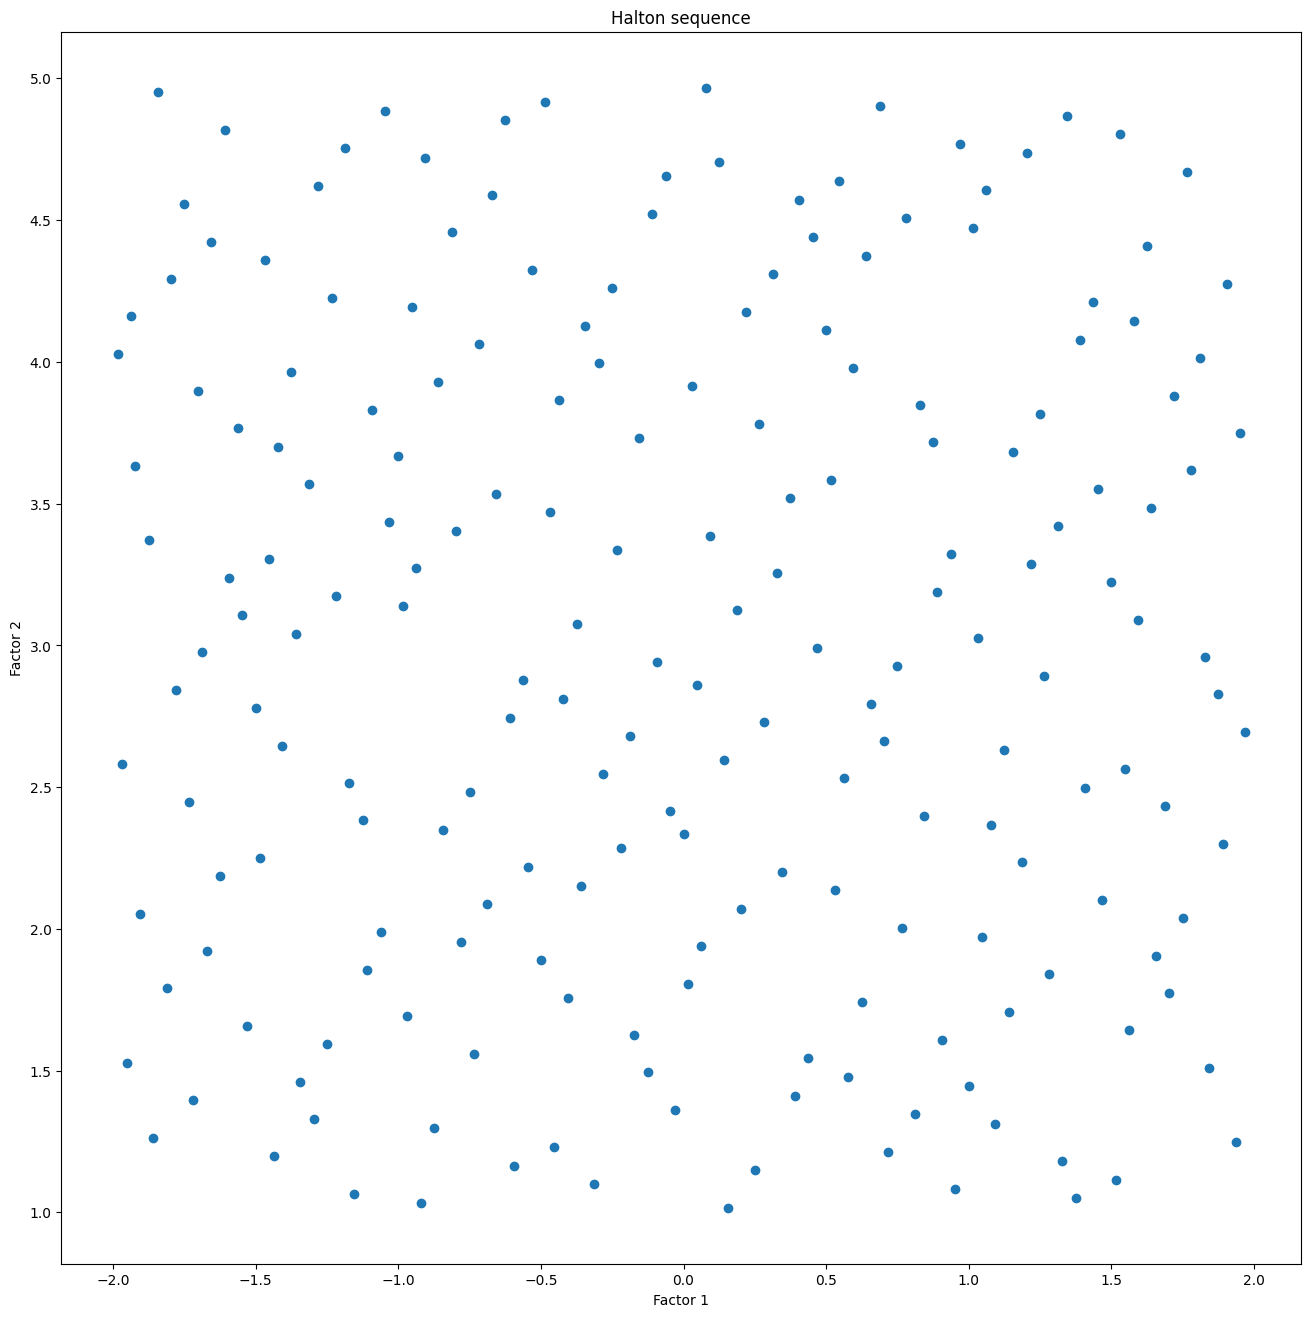

[[ 0.          2.33333333]
 [-1.          3.66666667]
 [ 1.          1.44444444]
 [-1.5         2.77777778]
 [ 0.5         4.11111111]
 [-0.5         1.88888889]
 [ 1.5         3.22222222]
 [-1.75        4.55555556]
 [ 0.25        1.14814815]
 [-0.75        2.48148148]
 [ 1.25        3.81481481]
 [-1.25        1.59259259]
 [ 0.75        2.92592593]
 [-0.25        4.25925926]
 [ 1.75        2.03703704]
 [-1.875       3.37037037]
 [ 0.125       4.7037037 ]
 [-0.875       1.2962963 ]
 [ 1.125       2.62962963]
 [-1.375       3.96296296]
 [ 0.625       1.74074074]
 [-0.375       3.07407407]
 [ 1.625       4.40740741]
 [-1.625       2.18518519]
 [ 0.375       3.51851852]
 [-0.625       4.85185185]
 [ 1.375       1.04938272]
 [-1.125       2.38271605]
 [ 0.875       3.71604938]
 [-0.125       1.49382716]
 [ 1.875       2.82716049]
 [-1.9375      4.16049383]
 [ 0.0625      1.9382716 ]
 [-0.9375      3.27160494]
 [ 1.0625      4.60493827]
 [-1.4375      1.19753086]
 [ 0.5625      2.5308642 ]
 

In [119]:
from e2ml.experimentation import halton

# Generate 200 two-dimensional conditions with the Halton sequence
# in the hypercube [-2, 2] x [1, 5].
X = halton(200, 2, [[-2, 2], [1, 5]])

# Plot generated conditions.
fig = plt.figure(figsize=(16, 16))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Halton sequence')
plt.show()

# Print the design matrix
print(X)

# Print the number of combinations
print(f'Number of combinations: {X.shape[0]}')

# Print the number of factors
print(f'Number of factors: {X.shape[1]}')


### **3. Latin Hypercube** <a class="anchor" id="latin-hypercube"></a>

Now, we will implement the Latin hypercube technique for experimental design.
We implement the function [`lat_hyp_cube_unit`](../e2ml/experimentation/_latin_hypercube.py) in the [`e2ml.experimentation`](../e2ml/experimentation) subpackage. It generates conditions $\mathbf{x} \in [0, 1]^D$.

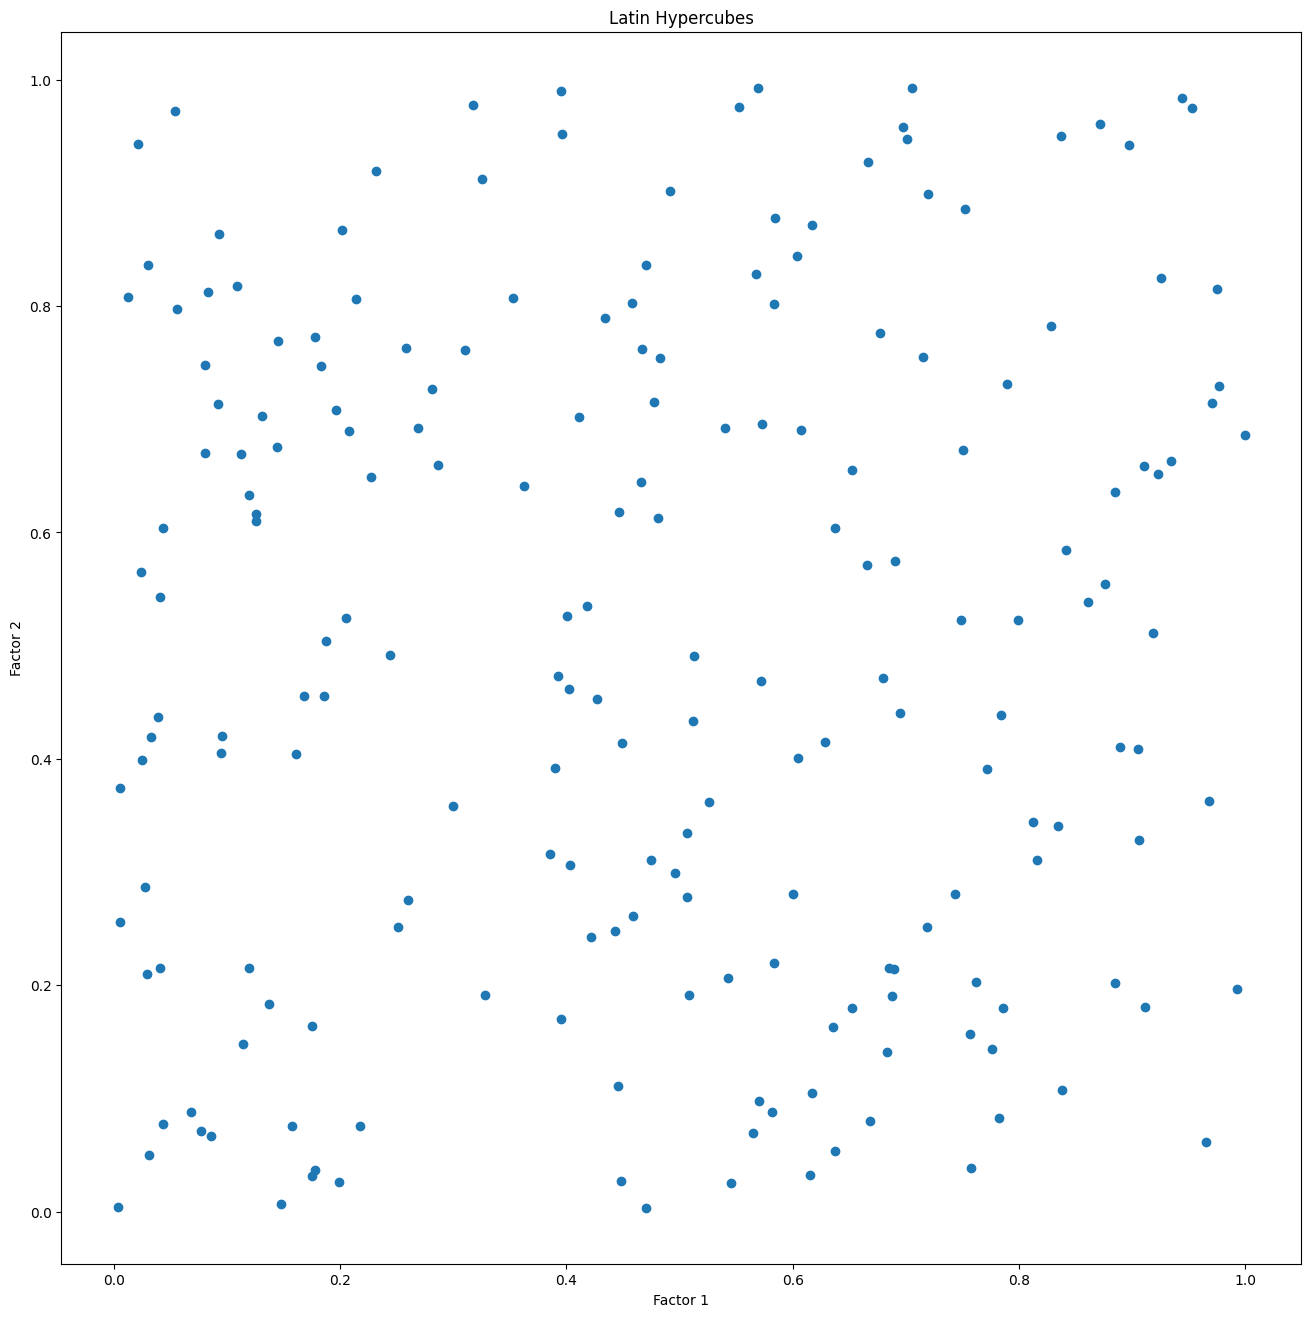

[[0.68310711 0.14086425]
 [0.84173881 0.58471899]
 [0.07694409 0.07132931]
 [0.60722328 0.69066372]
 [0.66840837 0.08050933]
 [0.4460523  0.61831664]
 [0.14807742 0.00643864]
 [0.3858717  0.31594474]
 [0.42126573 0.24230842]
 [0.04381717 0.60424855]
 [0.11217424 0.66951647]
 [0.26897673 0.69191285]
 [0.68527618 0.21520967]
 [0.49169993 0.90144993]
 [0.25102199 0.25112287]
 [0.44823367 0.02706681]
 [0.25793063 0.76313532]
 [0.21368531 0.80650292]
 [0.71988031 0.8989002 ]
 [0.03038417 0.83662684]
 [0.44906664 0.41384535]
 [0.54055878 0.69271767]
 [0.78211463 0.08301746]
 [0.01217728 0.80800126]
 [0.75766028 0.03854618]
 [0.14491451 0.76947568]
 [0.71843655 0.25118766]
 [0.6376907  0.60384567]
 [0.78413556 0.43870748]
 [0.75231392 0.88597592]
 [0.69457338 0.4402272 ]
 [0.54323806 0.20627529]
 [0.5069174  0.33438198]
 [0.45885511 0.26157953]
 [0.95284987 0.97477808]
 [0.81243917 0.3438143 ]
 [0.05599551 0.79704573]
 [0.08605295 0.0670638 ]
 [0.42736    0.45284411]
 [0.2014488  0.86729854]


In [120]:
from e2ml.experimentation import lat_hyp_cube_unit

# Generate 200 two-dimensional conditions `X` with the Latin hypercube.
X = lat_hyp_cube_unit(200, 2)

# Plot generated conditions.
fig = plt.figure(figsize=(16, 16))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Latin Hypercubes')
plt.show()

# Print the design matrix
print(X)

# Print the number of combinations
print(f'Number of combinations: {X.shape[0]}')

# Print the number of factors
print(f'Number of factors: {X.shape[1]}')

Similar to Halton, we extend the function [`lat_hyp_cube_unit`](../e2ml/experimentation/_latin_hypercube.py) by allowing to define boundaries for each dimension's interval through scaling. Therefore, we implement the function [`lat_hyp_cube`](../e2ml/experimentation/_latin_hypercube.py) in the [`e2ml.experimentation`](../e2ml/experimentation) subpackage.

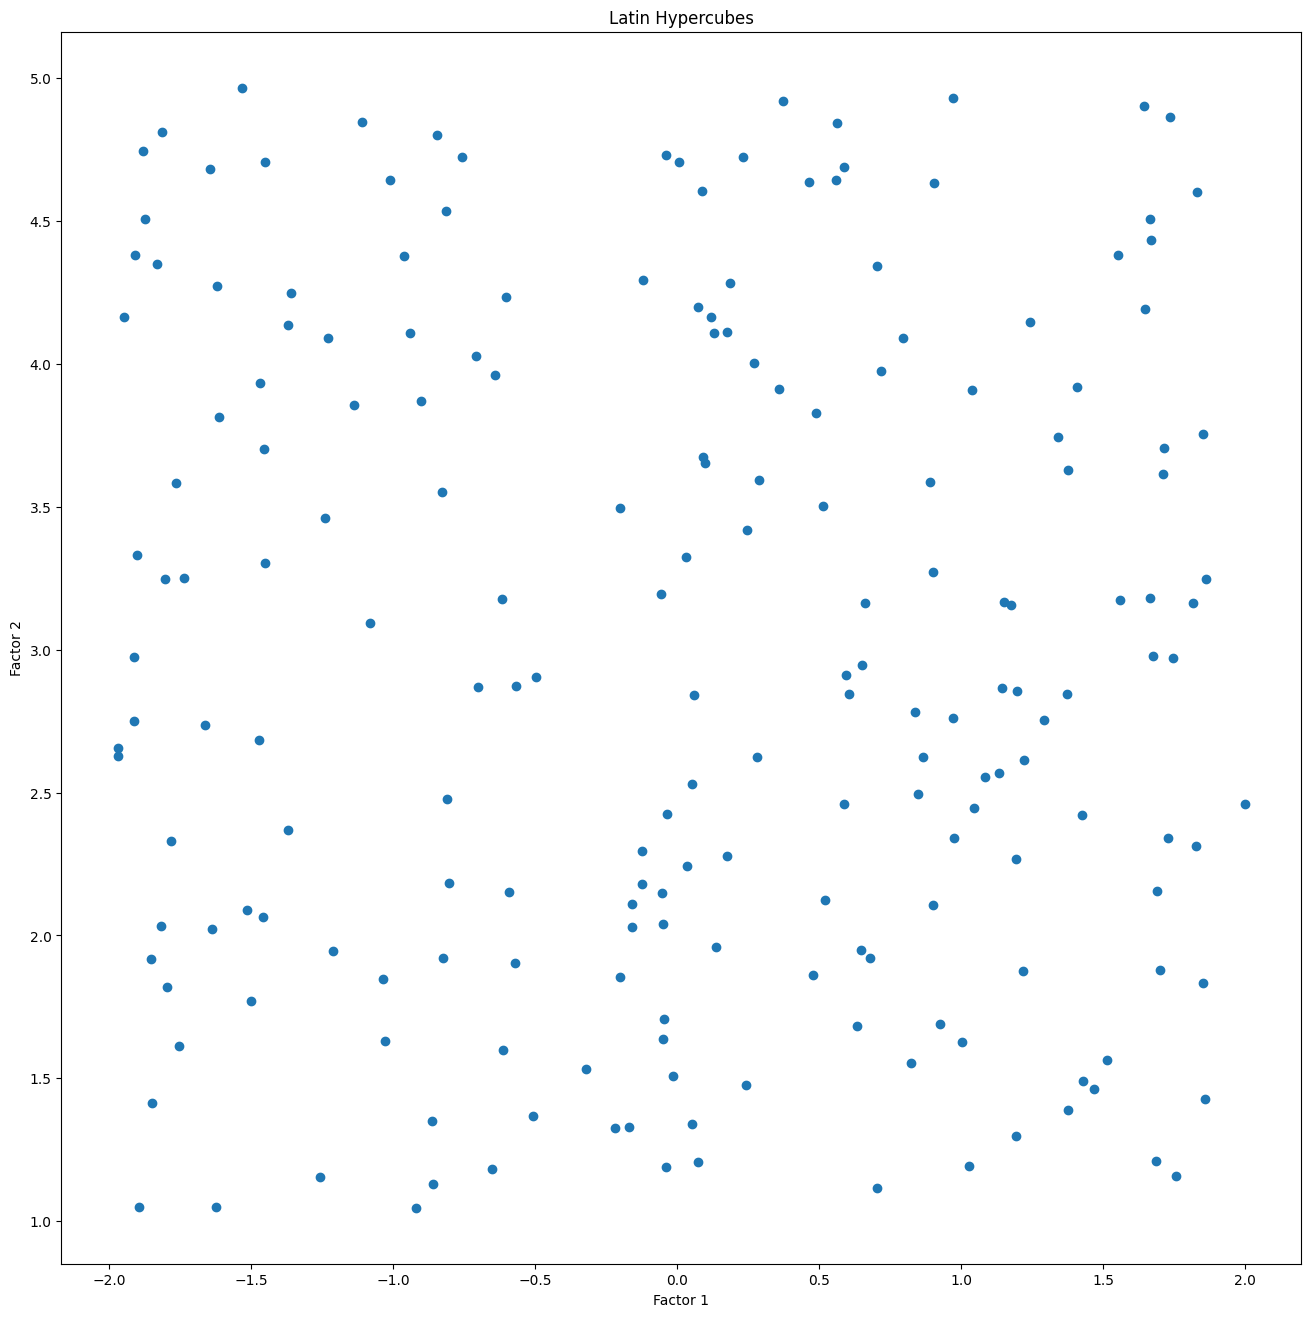

[[ 1.37817452  1.3906183 ]
 [-0.56713818  2.87418365]
 [-1.91115534  2.75199629]
 [-1.45160707  3.30344976]
 [-0.85911935  1.13093274]
 [-1.01002779  4.64399181]
 [ 0.05150961  2.52821272]
 [ 0.60721504  2.84530466]
 [-1.81314896  4.81169074]
 [ 1.51482558  1.56284307]
 [ 1.85841475  1.42584176]
 [ 0.12970439  4.10971231]
 [ 0.03674954  2.24183954]
 [-1.80411467  3.24728858]
 [ 1.1430628   2.86577496]
 [ 0.28960157  3.59291458]
 [-0.03895528  4.73055138]
 [ 1.99957883  2.45935017]
 [-1.22943138  4.09226839]
 [ 0.27190482  4.00290501]
 [ 0.55891389  4.644423  ]
 [ 0.05362513  1.33907433]
 [ 1.13532133  2.56715227]
 [ 0.07543812  1.20608325]
 [-0.60049241  4.23427833]
 [-0.01486032  1.50718426]
 [ 1.04538392  2.44518597]
 [-1.96952658  2.65625059]
 [ 1.19255784  2.26735529]
 [ 0.46338605  4.6351321 ]
 [ 0.64664669  1.94824748]
 [-0.80975125  2.47762874]
 [-1.20974575  1.94708948]
 [ 0.07385681  4.20063527]
 [-0.82281564  1.919999  ]
 [ 0.56401613  4.84366633]
 [ 1.75684155  1.15746175]
 

In [121]:
from e2ml.experimentation import lat_hyp_cube

# Generate 200 two-dimensional conditions `X` with the Latin hypercube
# in the hypercube [-2, 2] x [1, 5].
X = lat_hyp_cube(200, 2, [[-2, 2], [1, 5]])

# Plot generated conditions.
fig = plt.figure(figsize=(16, 16))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Latin Hypercubes')
plt.show()

# Print the design matrix
print(X)

# Print the number of combinations
print(f'Number of combinations: {X.shape[0]}')

# Print the number of factors
print(f'Number of factors: {X.shape[1]}')

### **4. Comparison of Space Filling Techniques** <a class="anchor" id="spacefilling-techniques"></a>


In this section, we compare the Halton sequence, Latin hypercube, and uniform sampling. First, we compare them just visually. Therefore, we plot 200 conditions generated in the two-dimensional unit cube by the respective technique.

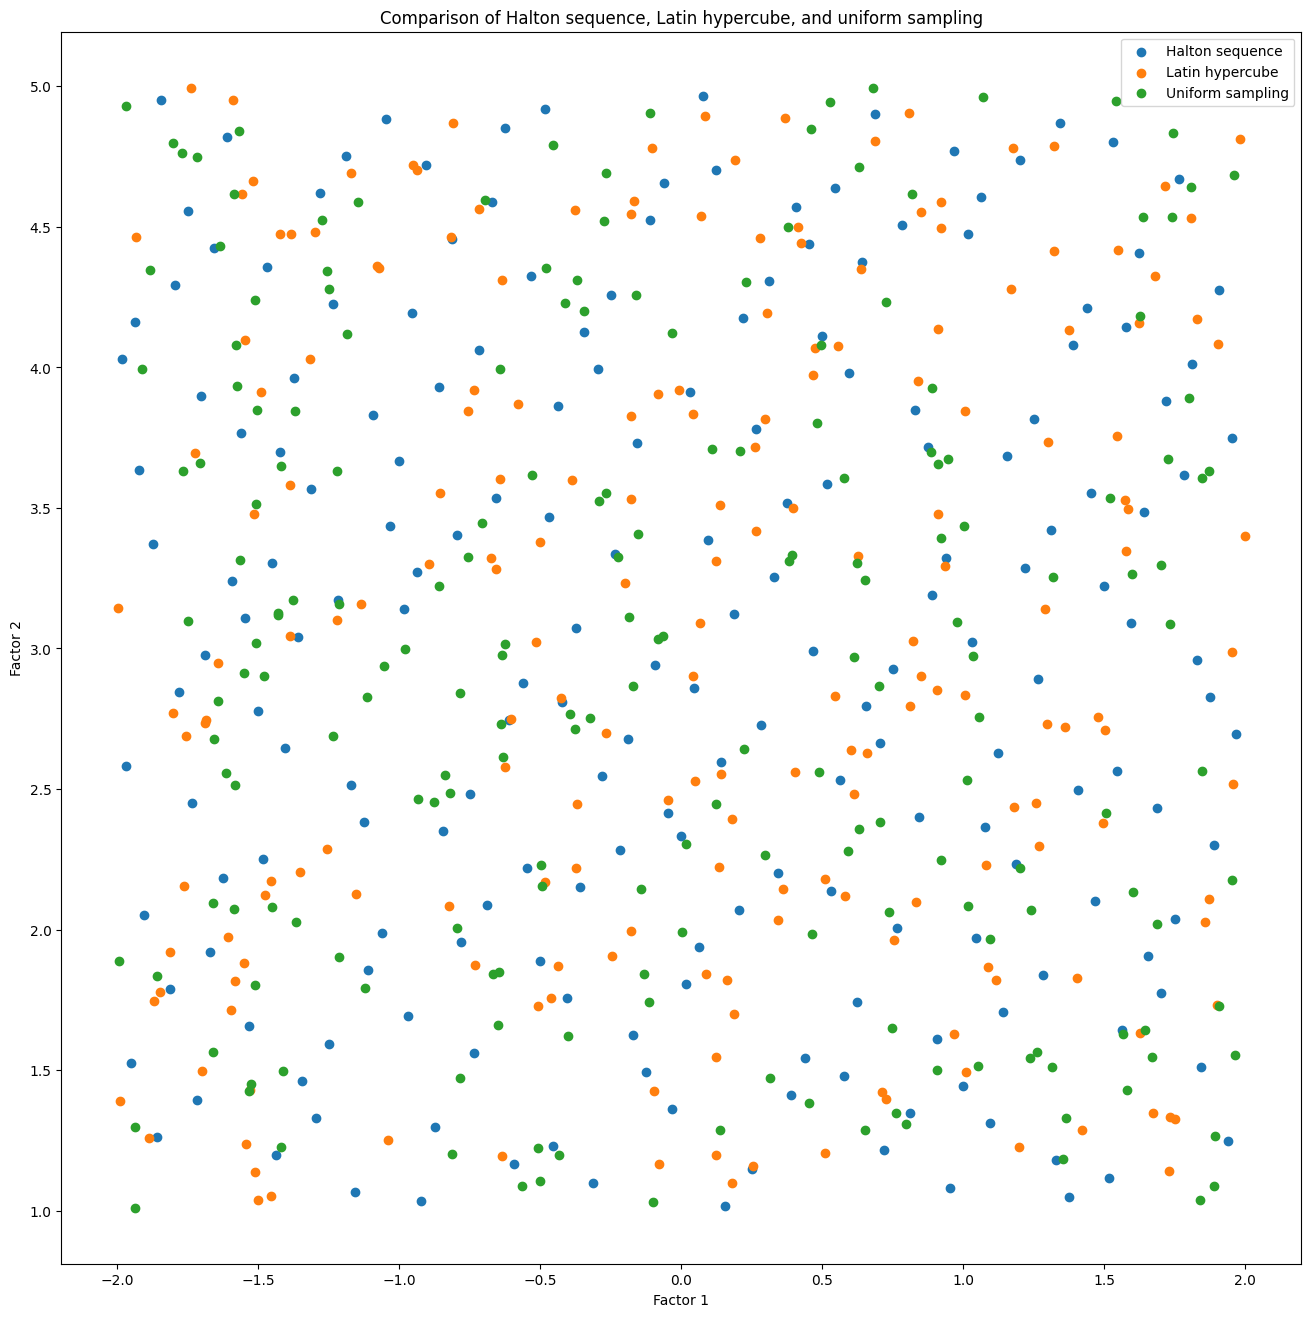

In [122]:
# Visual comparison of Halton sequence, Latin hypercube, and uniform sampling.
halton_sequence = halton(200, 2, [[-2, 2], [1, 5]])
latin_hypercube = lat_hyp_cube(200, 2, [[-2, 2], [1, 5]])
uniform_sampling = np.array([np.random.uniform(-2, 2, 200), np.random.uniform(1, 5, 200)])
fig = plt.figure(figsize=(16, 16))
plt.scatter(halton_sequence[:, 0], halton_sequence[:, 1], label='Halton sequence')
plt.scatter(latin_hypercube[:, 0], latin_hypercube[:, 1], label='Latin hypercube')
plt.scatter(uniform_sampling[0], uniform_sampling[1], label='Uniform sampling')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Comparison of Halton sequence, Latin hypercube, and uniform sampling')
plt.legend()
plt.show()


For a quantitative comparison, we want to approximate the integral of a cosine-shaped function in the interval $[-\pi, +\pi]$:

\begin{align*}
    f(x) &= \cos(x) + 1, \\
    F(x) &= \sin(x) + x + C.
\end{align*}

Accordingly, the definite integral in the interval $[-\pi, +\pi]$ is given through:

_Answer:_ <br/>
    $F(\pi) - F(-\pi) = \sin(\pi) + \pi + C - \sin(-\pi) - (-\pi) - C = 2\pi.$

#### Question:
4. (a) Imagine, we can only generate conditions of the form $(x_1, x_2)^\mathrm{T}$ with $x_1 \in [-\pi, +\pi], x_2 \in [0, 2]$ and can only ask for the information whether $x_2 \in [0, f(x_1)]$ or $x_2 \in (f(x_1), 2]$ is true. How can we approximate the above definite integral through sampling and making use of this information?

    _Answer:_ <br/>
        
   
In the following, we compare the error of uniform sampling, Halton sequence, and Latin hypercube to approximate the above definite integral for different numbers of conditions.

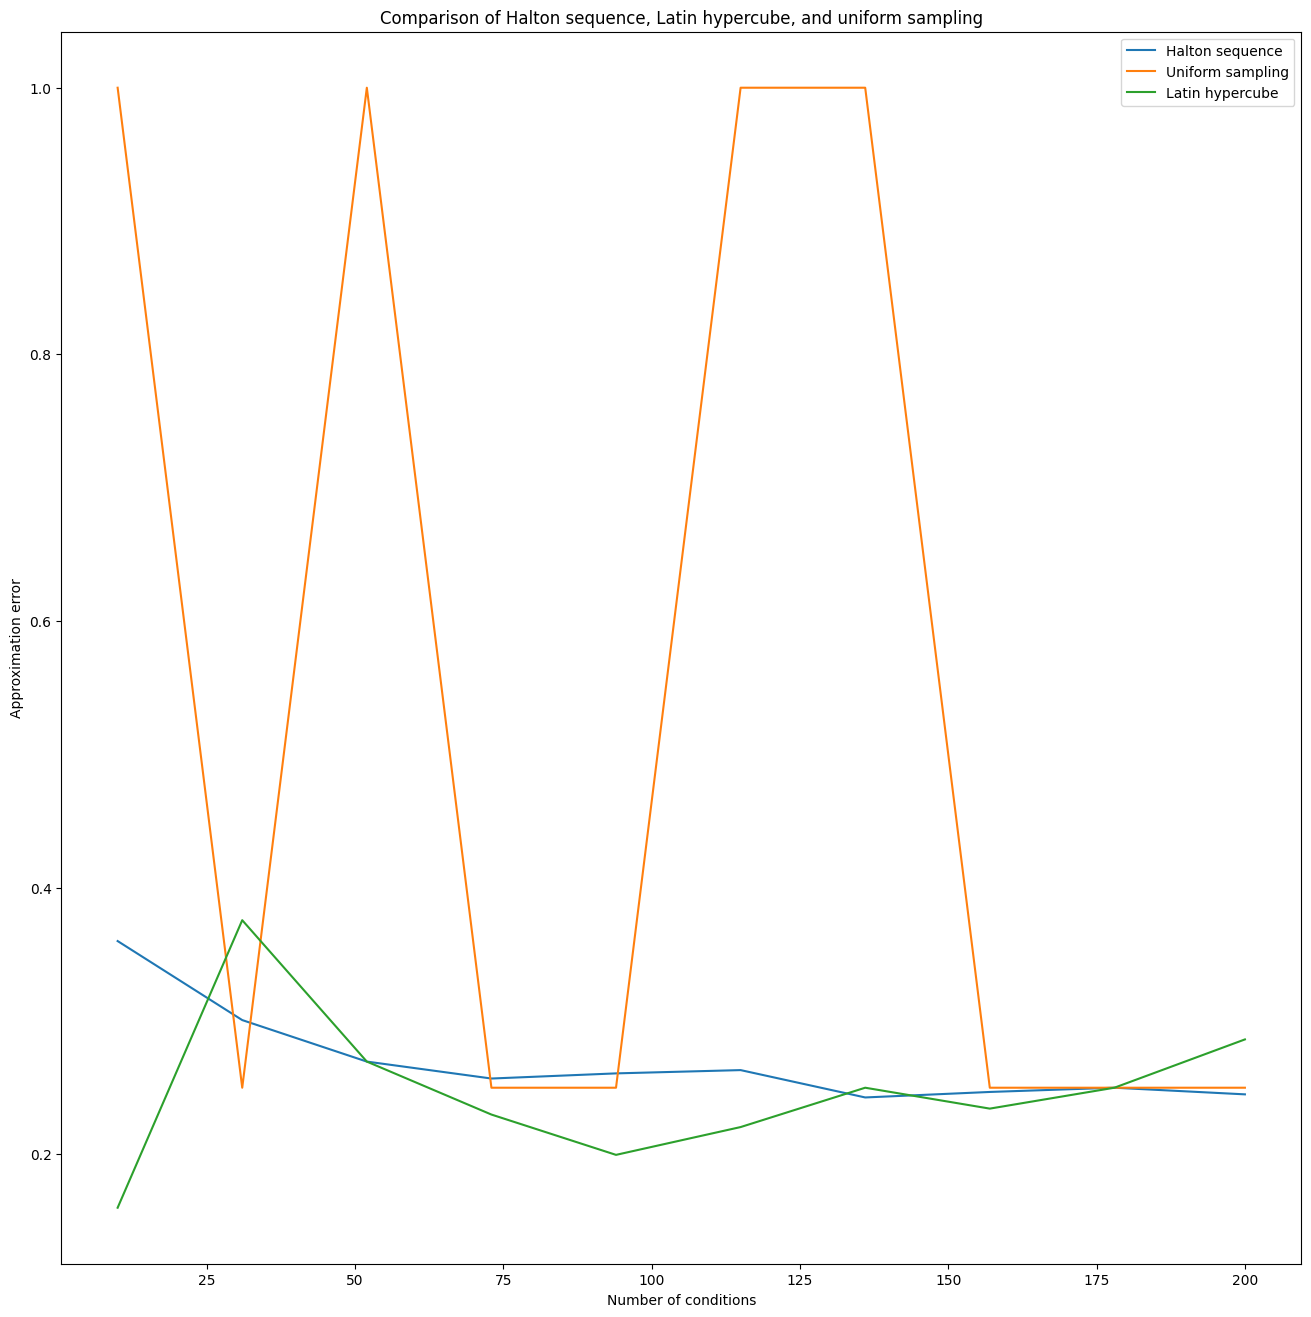

In [145]:
def compute_approximation_error(X):
    """
    Computes mean squared error for the definite integral of
    function f(x) = cos(x) + 1 in the interval [-pi, pi].

    Parameters
    ----------
    X : numpy.ndarray of shape (n_conditions, 2)
        Conditions with `X[:, 0]` in [-pi, pi] and `X[:, 1]` in [0, 2].

    Returns
    -------
    error : float
        Mean squared error between approximated and true value of
        the definite integral.
    """
    def func(x): return np.cos(x) + 1
    true_value = func(np.pi) - func(-np.pi)
    approximated_value = np.mean(X[:, 1] <= func(X[:, 0]))
    error = (true_value - approximated_value) ** 2
    return error


# Numbers of conditions to be tested.
n_conditions_list = np.linspace(10, 200, 10, dtype=int)


halton_errors = []
halton_values = []
latin_hypercube_errors = []
latin_hypercube_values = []
uniform_errors = []
uniform_values = []

for n_conditions in n_conditions_list:
    n_conditions = int(n_conditions)

    # Compute approximation errors for Halton sequence.
    X = halton(n_conditions, 2, [[-np.pi, np.pi], [0, 2]])
    halton_errors.append(compute_approximation_error(X))
    halton_values.append(np.sum(X[:, 1] <= (np.cos(X[:, 0]) + 1))/n_conditions)

    # Compute approximation errors for uniform sampling.
    X = np.array([np.random.uniform(-np.pi, np.pi, n_conditions),
                 np.random.uniform(0, 2, n_conditions)])
    uniform_errors.append(compute_approximation_error(X))
    uniform_values.append(
        np.sum(X[:, 1] <= (np.cos(X[:, 0]) + 1))/n_conditions)

    # Compute approximation errors for Latin Hypercube.
    X = lat_hyp_cube(n_conditions, 2, [[-np.pi, np.pi], [0, 2]])
    latin_hypercube_errors.append(compute_approximation_error(X))
    latin_hypercube_values.append(
        np.sum(X[:, 1] <= (np.cos(X[:, 0]) + 1))/n_conditions)


# Plot computed approximation errors along numbers of generated conditions.
fig = plt.figure(figsize=(16, 16))
plt.plot(n_conditions_list, halton_errors, label='Halton sequence')
plt.plot(n_conditions_list, uniform_errors, label='Uniform sampling')
plt.plot(n_conditions_list, latin_hypercube_errors, label='Latin hypercube')
plt.xlabel('Number of conditions')
plt.ylabel('Approximation error')
plt.title('Comparison of Halton sequence, Latin hypercube, and uniform sampling')
plt.legend()
plt.show()
